In [23]:
# -*- coding: utf-8 -*-
%matplotlib inline

import pandas as pd
import numpy as np
import math
import matplotlib as mplstyle
import matplotlib.pyplot as plt
import locale
from locale import atof
from dateutil import parser
from datetime import datetime

plt.style.use('fivethirtyeight')

In [24]:
# Imported data folder
df_incomeLimits = pd.read_csv('school_choice_data/imported_data/income_limits.csv')
df_studentByGrade = pd.read_csv('school_choice_data/imported_data/student_by_grade.csv')
df_studentParticipation = pd.read_csv('school_choice_data/imported_data/student_participation_num.csv')
df_schoolParticipation = pd.read_csv('school_choice_data/imported_data/school_participation.csv')
df_enrollment = pd.read_csv('school_choice_data/imported_data/enrollment.csv')
df_previouslyPublicSchool = pd.read_csv('school_choice_data/imported_data/previous_public_school.csv')
df_studentPathway = pd.read_csv('school_choice_data/imported_data/student_by_pathway.csv')
df_studentEthnicity = pd.read_csv('school_choice_data/imported_data/student_by_ethnicity.csv')
df_studentGender = pd.read_csv('school_choice_data/imported_data/student_by_gender.csv')
df_studentGeography = pd.read_csv('school_choice_data/imported_data/student_by_geography.csv')
df_schoolAwardCount = pd.read_csv('school_choice_data/imported_data/awards_by_school_16_clean.csv')
df_schoolAwardAmount = pd.read_csv('school_choice_data/imported_data/amount_by_school_16_clean.csv')
df_vouchersByOgSchoolDistrict = pd.read_csv('school_choice_data/imported_data/voucher-students-by-original-school-district.csv')

# Gov data folder
df_schoolEnrollment = pd.read_csv('school_choice_data/gov_data/EnrollmentGradeSchls.csv')
df_schoolSpecEdEnrollment = pd.read_csv('school_choice_data/gov_data/EnrollmentEnglishLearnerSpecEdSchls.csv')
df_publicSpecEd = pd.read_csv('school_choice_data/gov_data/PublicEnrollmentEnglishLearnerSpecEd.csv')

In [25]:
# Functions

# normalize numbers
def normalizeNums(num):
    if (math.isnan(num)):
        return None
    else:
        num = int(math.floor(num))
        return num
    
# multiply by 100 to convert from percent
def convertPercent(num):
    return num * 100

# normalize percent from x%
def normalizePerc(num):
    return float(num.strip('%'))
    

# get average award
def averageAward(awardCount, awardAmount):
    if math.isnan(awardAmount) or math.isnan(awardCount):
        return None
    return round((awardAmount/awardCount),2)

# Convert NaN to zeros
# the zeros do not always indicate that no students 
# were in the program. schools with less than ten 
# students do not have to report 
def convertInt(num):
    if math.isnan(num):
        return 0
    else:
        return int(num)
    
# calculate percent
def calcPerc(num, denom):
    if num != 0:
        percent = (float(num/denom))*100
        return round(percent,2)
    else:
        return None
    
# calculate percent change
def percentChange(oldVal, newVal):
    val1 = float(oldVal)
    val2 = float(newVal)
    change = (val2-val1)/val1
    return float(change)

# fill in missing values
def fillInfo(choiceCell, backupCell):
    if pd.isnull(choiceCell):
        return backupCell
    else:
        return choiceCell
    
# replace with None
def fillNone(num):
    if num == 1:
        return None
    else:
        return num 
    
def convertToStr(item):
    if item == 'nan':
        return None
    else:
        strID = item.split('.', 1)[0]
        return strID

In [26]:
# Drop total row in dataframe
df_studenByGradeNoTotal = df_studentByGrade.drop(13)

(0, 4500)

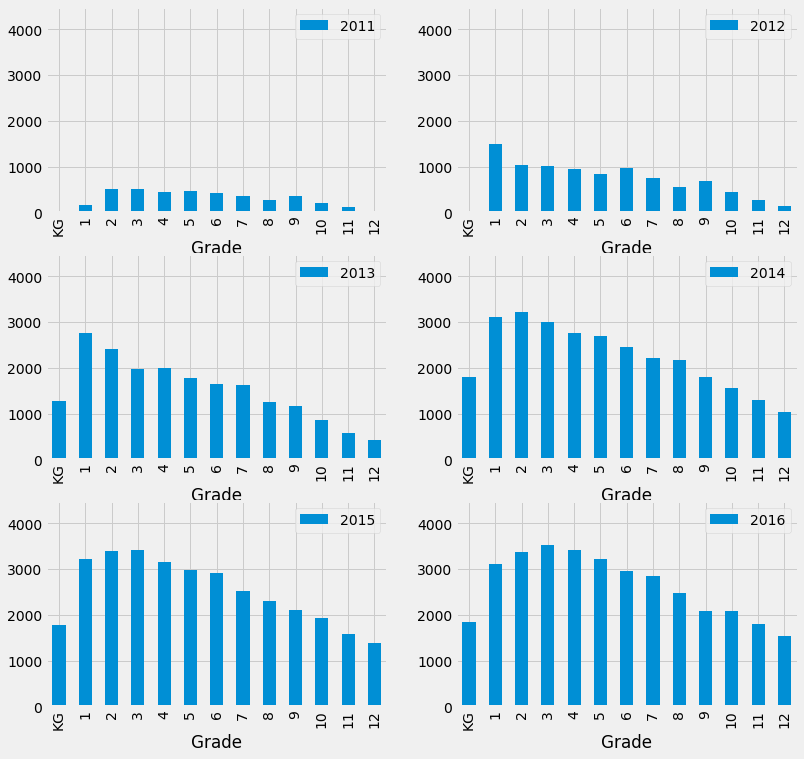

In [27]:
# Students by grade, by year
studentsByGrade = fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(12,12), sharex=False, sharey=False)

df_studenByGradeNoTotal.plot(kind='bar',x='Grade',y='2011',ax=ax1).set_ylim([0,4500])
df_studenByGradeNoTotal.plot(kind='bar',x='Grade',y='2012',ax=ax2).set_ylim([0,4500])
df_studenByGradeNoTotal.plot(kind='bar',x='Grade',y='2013',ax=ax3).set_ylim([0,4500])
df_studenByGradeNoTotal.plot(kind='bar',x='Grade',y='2014',ax=ax4).set_ylim([0,4500])
df_studenByGradeNoTotal.plot(kind='bar',x='Grade',y='2015',ax=ax5).set_ylim([0,4500])
df_studenByGradeNoTotal.plot(kind='bar',x='Grade',y='2016',ax=ax6).set_ylim([0,4500])

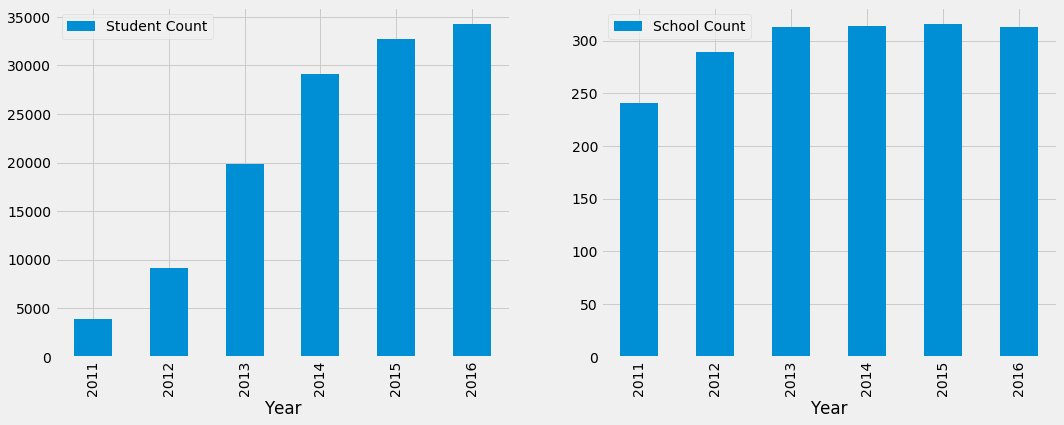

In [28]:
# Student count and school count by year
fig, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(16,6), sharex=False, sharey=False)

df_studentParticipation.plot(kind='bar',x='Year',y='Student Count',ax=ax1)
df_schoolParticipation.plot(kind='bar',x='Year',y='School Count',ax=ax2)

In [29]:
# Calculate the change in enrollment from public and private schools
public_school_change = (df_enrollment['Traditional Public Num'][5] - df_enrollment['Traditional Public Num'][0])*-1
choice_school_change = (df_enrollment['Choice Num'][5] - df_enrollment['Choice Num'][0])
non_public_school_change = (df_enrollment['Non-Public (Excluding Choice Students)* Num'][5] - df_enrollment['Non-Public (Excluding Choice Students)* Num'][0])*-1

starting_count = df_studentParticipation['Student Count'][0]
current_count = df_studentParticipation['Student Count'][5]
count_change = current_count - starting_count


print("Since the start of the program, public schools lost %s kids.") %  public_school_change
print("Since the start of the program, non-public schools lost %s kids.") %  non_public_school_change
print("Since the start of the program, choice schools gained %s kids.") %  choice_school_change
print("The school choice program started with %s kids and grew to %s kids in the 2016-17 school year.") % (starting_count, current_count)

Since the start of the program, public schools lost 8630 kids.
Since the start of the program, non-public schools lost 18718 kids.
Since the start of the program, choice schools gained 30388 kids.
The school choice program started with 3911 kids and grew to 34299 kids in the 2016-17 school year.


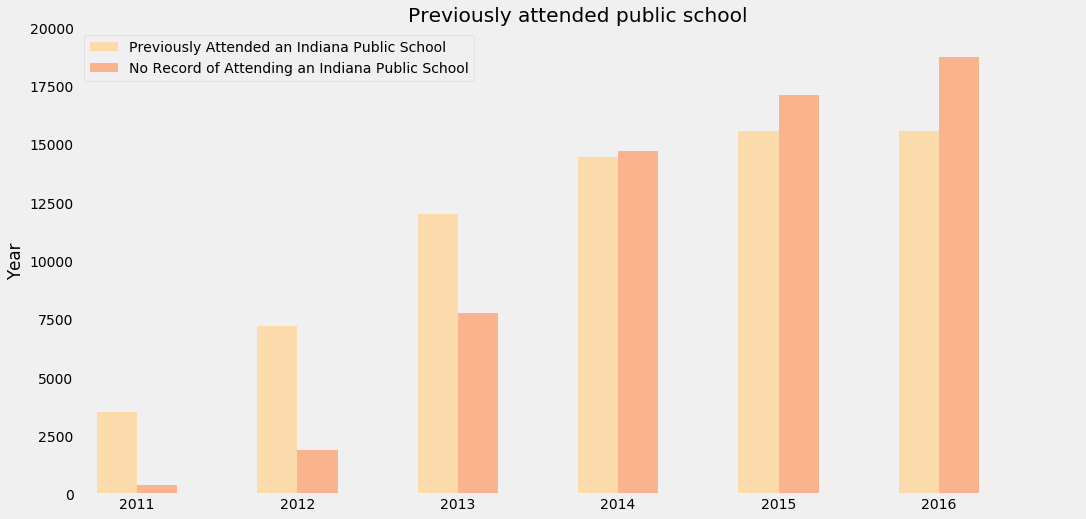

In [30]:
# Graph the number who have or have not previously attended public school
# Setting the positions and width for the bars
pos = list(range(len(df_previouslyPublicSchool['Previously Attended an Indiana Public School'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(16,8))

# Create a bar with previous data
plt.bar(pos, 
        df_previouslyPublicSchool['Previously Attended an Indiana Public School'], 
        width, 
        alpha=0.8, 
        color='#ffd59b', 
        label=df_previouslyPublicSchool['Year'][0])

# Create a bar with no record data
plt.bar([p + width for p in pos], 
        df_previouslyPublicSchool['No Record of Attending an Indiana Public School'], 
        width, 
        alpha=0.8, 
        color='#ffa474', 
        label=df_previouslyPublicSchool['Year'][1])

# Set the y axis label
ax.set_ylabel('Year')

# Set the chart's title
ax.set_title('Previously attended public school')

# Set the position of the x ticks
ax.set_xticks([p + .5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_previouslyPublicSchool['Year'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 20000])

# Adding the legend and showing the plot
plt.legend(['Previously Attended an Indiana Public School', 'No Record of Attending an Indiana Public School'], loc='upper left')
plt.grid()
plt.show()

In [31]:
# Drop totals in student pathway dataframe
df_studentPathwayWoTotal = df_studentPathway.drop([4,8,9])

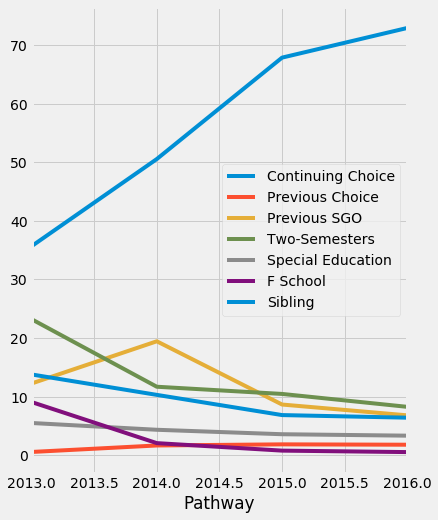

In [32]:
# Drop raw pathway numbers
df_studentPathwayPerc = df_studentPathwayWoTotal.drop(['2013','2014','2015','2016'], axis=1)

# Convert percentage 
df_studentPathwayPerc['2013 %'] = df_studentPathwayPerc['2013 %'].apply(convertPercent)
df_studentPathwayPerc['2014 %'] = df_studentPathwayPerc['2014 %'].apply(convertPercent)
df_studentPathwayPerc['2015 %'] = df_studentPathwayPerc['2015 %'].apply(convertPercent)
df_studentPathwayPerc['2016 %'] = df_studentPathwayPerc['2016 %'].apply(convertPercent)

# Transpose pathway dataframe, export and reupload
df_studentPathwayPercExport = df_studentPathwayPerc.transpose()
df_studentPathwayPercExport.to_csv('school_choice_data/exported_data/df_studentPathwayPerc.csv')
df_studentPathwayPercTransposed = pd.read_csv('school_choice_data/imported_data/df_studentPathwayPerc-transposed.csv')

# Graph student pathway
fig, ((ax1)) = plt.subplots(nrows=1, ncols=1, figsize=(6,8), sharex=False, sharey=False)

df_studentPathwayPercTransposed.plot(kind='line',x='Pathway',y='Continuing Choice',ax=ax1)
df_studentPathwayPercTransposed.plot(kind='line',x='Pathway',y='Previous Choice',ax=ax1)
df_studentPathwayPercTransposed.plot(kind='line',x='Pathway',y='Previous SGO',ax=ax1)
df_studentPathwayPercTransposed.plot(kind='line',x='Pathway',y='Two-Semesters',ax=ax1)
df_studentPathwayPercTransposed.plot(kind='line',x='Pathway',y='Special Education',ax=ax1)
df_studentPathwayPercTransposed.plot(kind='line',x='Pathway',y='F School',ax=ax1)
df_studentPathwayPercTransposed.plot(kind='line',x='Pathway',y='Sibling',ax=ax1)

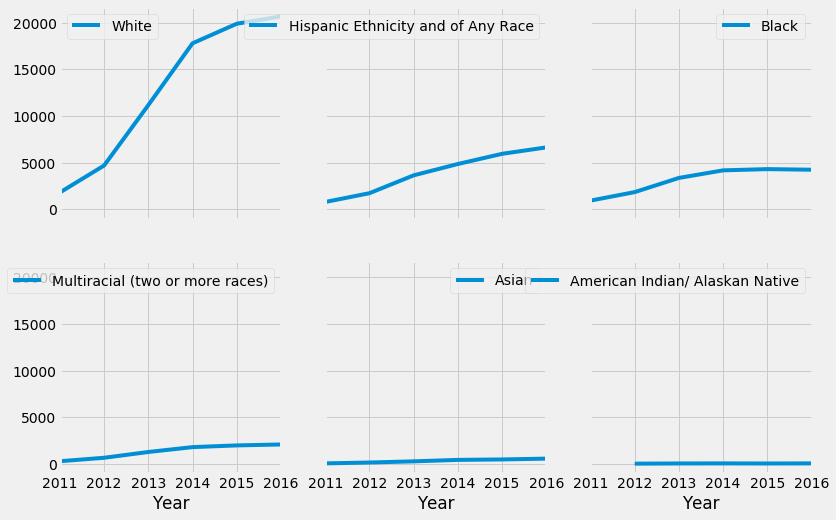

In [33]:
# Graph student ethnicity numbers by year
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(12,8), sharex=True, sharey=True)

df_studentEthnicity.plot(kind='line',x='Year',y='White',ax=ax1)
df_studentEthnicity.plot(kind='line',x='Year',y='Hispanic Ethnicity and of Any Race',ax=ax2)
df_studentEthnicity.plot(kind='line',x='Year',y='Black',ax=ax3)
df_studentEthnicity.plot(kind='line',x='Year',y='Multiracial (two or more races)',ax=ax4)
df_studentEthnicity.plot(kind='line',x='Year',y='Asian',ax=ax5)
df_studentEthnicity.plot(kind='line',x='Year',y='American Indian/ Alaskan Native',ax=ax6)
# df_studentEthnicity.plot(kind='line',x='Year',y='Native Hawaiian or Other Pacific Islander',ax=ax1)

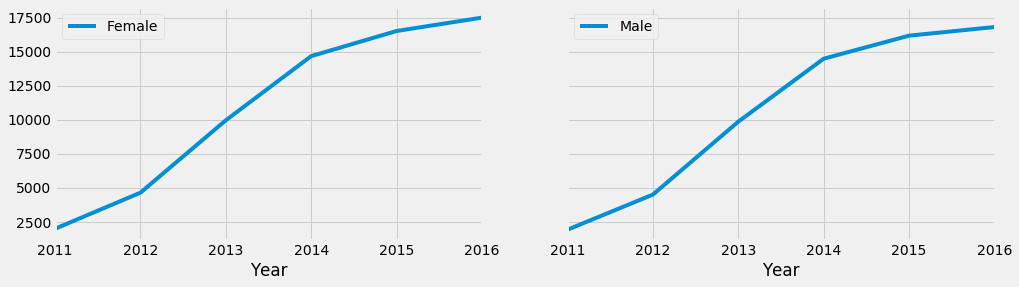

In [34]:
# Graph student gender numbers by year
fig, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15,4), sharex=True, sharey=True)

df_studentGender.plot(kind='line',x='Year',y='Female',ax=ax1)
df_studentGender.plot(kind='line',x='Year',y='Male',ax=ax2)

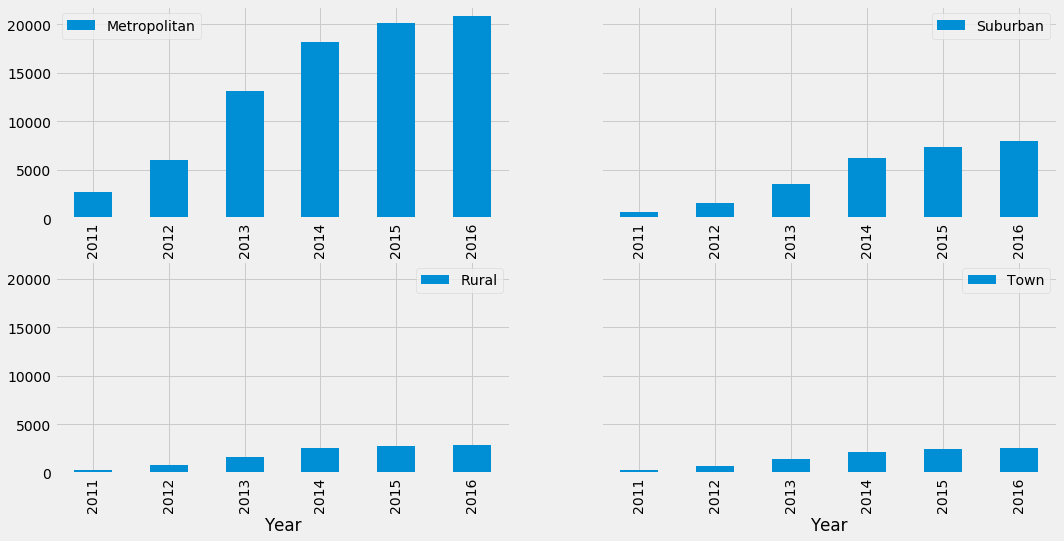

In [35]:
# Graph student geography numbers by year
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,8), sharex=False, sharey=True)

df_studentGeography.plot(kind="bar",x="Year",y="Metropolitan", ax=ax1)
df_studentGeography.plot(kind="bar",x="Year",y="Suburban", ax=ax2)
df_studentGeography.plot(kind="bar",x="Year",y="Rural", ax=ax3)
df_studentGeography.plot(kind="bar",x="Year",y="Town", ax=ax4)

In [36]:
# Duplicate df_schoolAwardAmount dataframe, find average award amount
df_AvgAwardAmt = df_schoolAwardAmount

df_AvgAwardAmt['2011'] = np.vectorize(averageAward)(df_schoolAwardCount['2011'],df_schoolAwardAmount['2011'])
df_AvgAwardAmt['2012'] = np.vectorize(averageAward)(df_schoolAwardCount['2012'],df_schoolAwardAmount['2012'])
df_AvgAwardAmt['2013'] = np.vectorize(averageAward)(df_schoolAwardCount['2013'],df_schoolAwardAmount['2013'])
df_AvgAwardAmt['2014'] = np.vectorize(averageAward)(df_schoolAwardCount['2014'],df_schoolAwardAmount['2014'])
df_AvgAwardAmt['2015'] = np.vectorize(averageAward)(df_schoolAwardCount['2015'],df_schoolAwardAmount['2015'])
df_AvgAwardAmt['2016'] = np.vectorize(averageAward)(df_schoolAwardCount['2016'],df_schoolAwardAmount['2016'])

# Export avg award amount
df_AvgAwardAmt.to_csv('school_choice_data/exported_data/df_AvgAwardAmt.csv')

In [37]:
# Sort avg award amount by school number
df_AvgAwardAmt_sorted = df_AvgAwardAmt.sort_values('School No.')

# Count values by county
df_CountySchoolsCount = pd.value_counts(df_AvgAwardAmt_sorted['County'].values)

In [38]:
# Merge award count and award amount
df_schoolsCountAmount = df_schoolAwardCount.merge(df_schoolAwardAmount,on='School No.',how='outer').drop(['School Name_y', 'County_y'], axis=1)
df_schoolsCountAmount = df_schoolsCountAmount.rename(columns = {'School Name_x':'School Name','County_x':'County','2011_x':'2011 Count','2012_x':'2012 Count','2013_x':'2013 Count','2014_x':'2014 Count','2015_x':'2015 Count','2016_x':'2016 Count','2011_y':'2011 Avg Amount','2012_y':'2012 Avg Amount','2013_y':'2013 Avg Amount','2014_y':'2014 Avg Amount','2015_y':'2015 Avg Amount','2016_y':'2016 Avg Amount'})
df_schoolsCountAmountCols = df_schoolsCountAmount.columns.tolist()
df_schoolsCountAmountCols = ['School No.',
                             'School Name',
                             'County',
                             '2011 Count',
                             '2011 Avg Amount',
                             '2012 Count',
                             '2012 Avg Amount',
                             '2013 Count',
                             '2013 Avg Amount',
                             '2014 Count',
                             '2014 Avg Amount',
                             '2015 Count',
                             '2015 Avg Amount',
                             '2016 Count',
                             '2016 Avg Amount']
df_schoolsCountAmount = df_schoolsCountAmount[df_schoolsCountAmountCols]

In [39]:
# Duplicate awards count df then convert to int
df_schoolsCountAmountClean = df_schoolsCountAmount

df_schoolsCountAmountClean['2011 Count'] = df_schoolsCountAmount['2011 Count'].apply(convertInt)
df_schoolsCountAmountClean['2012 Count'] = df_schoolsCountAmount['2012 Count'].apply(convertInt)
df_schoolsCountAmountClean['2013 Count'] = df_schoolsCountAmount['2013 Count'].apply(convertInt)
df_schoolsCountAmountClean['2014 Count'] = df_schoolsCountAmount['2014 Count'].apply(convertInt)
df_schoolsCountAmountClean['2015 Count'] = df_schoolsCountAmount['2015 Count'].apply(convertInt)
df_schoolsCountAmountClean['2016 Count'] = df_schoolsCountAmount['2016 Count'].apply(convertInt)

print('the zeros do not always indicate that no students were in the program.')
print('schools with less than ten students do not have to report')

the zeros do not always indicate that no students were in the program.
schools with less than ten students do not have to report


In [40]:
# import school ratings df
df_schoolRatings = pd.read_csv('school_choice_data/imported_data/final-2016-af-school-grades.csv')

df_schoolRatingsCond = df_schoolRatings.drop(['IDOE_CORPORATION_ID','CORPORATION_NAME'], axis=1)
df_schoolRatingsCond = df_schoolRatingsCond.rename(columns = {'IDOE_SCHOOL_ID':'School No.','SCHOOL_NAME':'School Name','2016 Grade':'2016_grade'})

In [41]:
# Import reworked awards data - data without symbols
df_schoolAwardsReworked = pd.read_csv('school_choice_data/imported_data/awards_by_school_16_reworked.csv')
df_schoolAwardsReworked

# dupe dataframe and apply fillNone function to all cells
df_schoolAwardsWithNull = df_schoolAwardsReworked
df_schoolAwardsWithNull['2011'] = df_schoolAwardsWithNull['2011'].apply(fillNone)
df_schoolAwardsWithNull['2012'] = df_schoolAwardsWithNull['2012'].apply(fillNone)
df_schoolAwardsWithNull['2013'] = df_schoolAwardsWithNull['2013'].apply(fillNone)
df_schoolAwardsWithNull['2014'] = df_schoolAwardsWithNull['2014'].apply(fillNone)
df_schoolAwardsWithNull['2015'] = df_schoolAwardsWithNull['2015'].apply(fillNone)
df_schoolAwardsWithNull['2016'] = df_schoolAwardsWithNull['2016'].apply(fillNone)

In [42]:
# dupe dataframe and find the percent change in student count from the first year of SC in 2011 to current numbers
df_schoolsPercChange = df_schoolAwardsReworked
df_schoolsPercChange['percent_change'] = np.vectorize(percentChange)(df_schoolAwardsReworked['2011'],df_schoolAwardsReworked['2016'])

# dupe dataframe and find the percent change in awards from the first year of SC in 2011 to current numbers
df_schoolAwardsPercChange = df_schoolAwardsWithNull
df_schoolAwardsPercChange['percent_change'] = np.vectorize(percentChange)(df_schoolAwardsPercChange['2011'],df_schoolAwardsPercChange['2016'])

In [43]:
# Merge school ratings and awards percent change; clean dataframe
df_schoolsChangeGrade = df_schoolRatingsCond.merge(df_schoolAwardsPercChange,on='School No.', how='outer').drop(['2012','2013','2014','2015'], axis=1)
df_schoolsChangeGrade['School Name'] = np.vectorize(fillInfo)(df_schoolsChangeGrade['School Name_y'],df_schoolsChangeGrade['School Name_x'])

In [44]:
# organize dataframe with percent change: drop and reorder columns, then export to csv
df_schoolsChangeGrade = df_schoolsChangeGrade.drop(['School Name_x','School Name_y'], axis=1)
cols = list(df_schoolsChangeGrade)
df_schoolsChangeGrade = df_schoolsChangeGrade.rename(columns = {'percent_change':'Count % Change','2016_grade':'Grade', '2011':'SC 2011', '2016':'SC 2016'})
cols = ['School No.','School Name','County','Grade','SC 2011','SC 2016','Count % Change']
df_schoolsChangeGrade = df_schoolsChangeGrade[cols]
df_schoolsChangeGrade.sort_values('School Name').to_csv('school_choice_data/exported_data/df_schoolsChangeGrade.csv')